## Summary statistics and initial data exploration

In [10]:
import pandas as pd

df = pd.read_csv('Option2_part_a.csv', header = 0)
print(df.describe())
print(df.info())
print(df.head())

       displacement / Angstrom      strain  Spring Breaking  force / nN
count               198.000000  200.000000            200.0  200.000000
mean                 -0.007772    0.351960              0.0    0.000887
std                   0.532156    0.173274              0.0    0.036585
min                  -0.896000    0.001100              0.0   -0.067500
25%                  -0.545750    0.207575              0.0   -0.032575
50%                   0.013650    0.396150              0.0   -0.000400
75%                   0.495700    0.507450              0.0    0.032875
max                   0.895600    0.560000              0.0    0.070100
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   material_id              200 non-null    object 
 1   displacement / Angstrom  198 non-null    float64
 2   strain                   20

Each column contains 200 values however 2 of the values in 'displacement / Angstrom' are missing. Since this row is incomplete it will be removed from the dataset. The 'Spring Breaking' column contains all zeros, prehaps to indicate none of the springs broke, but this column will also be removed since it does not provide any useful information for analysis. 

Looking at the mean and standard deviation of the columns and comparing this with the maximum and minimum values suggests that there are no extreme outliers in the dataset. 'material_id' is the only catagorical variable in the dataset.

## Cleaning data

In [11]:
# removing the spring breaking column
df = df.drop(columns=['Spring Breaking'])

# removing rows with missing values
df = df.dropna()

## Data Overview

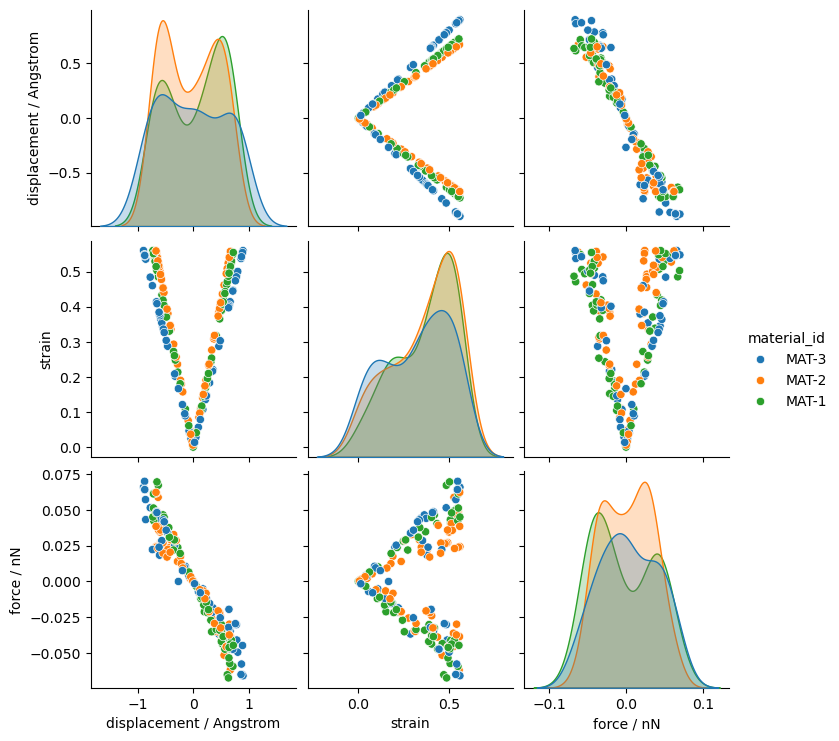

In [12]:
import seaborn as sns

sns.pairplot(df, hue = 'material_id')

## Issues
The data has some interesting symmetries. For the 'displacement' against 'strain' graph there is a line of symmetry down the x-axis. There are no strain values that are less than zero, the smallest value being $0.001100$. Its worth discussing if the points with negative displacement should remain on the graph since the symmetry doesn't give any additional insight into the data. The same is true for 'force/nN' against 'strain'. Perhaps the equipment was only capable of measuring the magnitude of the strain since if the force were acting in the opposite direction the strain would be in the opposite direction[reference]. 

There are two fixes to this:
1. Assume all points with negative displacement should have negative force or a negative displacement.
2. Take the absolute value of displacement when plotting against strain or vice versa and the absolute value of force when plotting against strain or vice versa.

Option 1 seems a better idea since only one column needs to be added to the data frame rather than two. The issue with this is that a row with a negative force isn't necessarily a value which has a negative displacement.

## Correlations
The scatter plots are helpful as they help asses the correlations between variables and also determine if the correlations between different metal types are the same.

- **'force/nN' against 'Displacement/Angstrom'** gives a relationship which doesn't appear linear, perhaps its cubic but could be some other relationship. The relationship looks to be slightly different for the each of the categories of materials. 
- Looking at the positive 'force/nN' values in **'force/nN' against 'strain'** shows that there is a strong positive correlation between the variables.
- Similarly looking at the positive 'Displacement/Angstrom' values in **'Displacement/Angstrom' against 'strain'** there is a clear strong positive correlation between the variables.

The kernel density estimation plots (KDEs) are helpful in seeing the distribution of different variables. Although some of these variables were likely controlled in the experiment.
- **Distribution of displacement** is symmetrical around y axis. The distributions for each different type of material seem to be different. Two peaks (bi-modal) but they all materials peak at the same point.
- **Distribution of strain** no symmetry around 0 since all values are positive. Distribution similar shape for all materials although the peak for material 3 is smaller than the others. Bi-modal the second peak occurs at the same time for all three materials. 
- **Distribution of force** Bi modal, with peaks offset from on another. Symmetry around y axis is less distinct.


## Correcting Strain

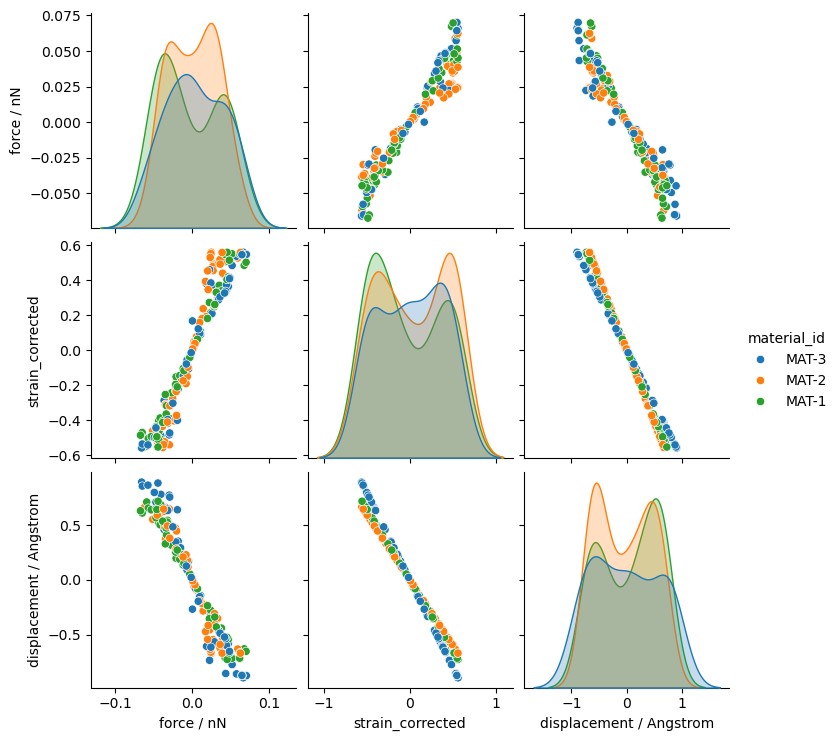

In [ ]:
# Create new column with corrected strain values
df['strain_corrected'] = df['strain'].copy()

# Make strain negative where force is negative
mask = (df['force / nN'] < 0)
df.loc[mask, 'strain_corrected'] = -df.loc[mask, 'strain']

sns.pairplot(df, hue='material_id', diag_kind='kde', vars=['force / nN', 'strain_corrected', 'displacement / Angstrom'])